In [4]:
import tensorflow as tf
In [2]: tf.__version__

'1.3.0'

In [5]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/data/", one_hot=True)

Extracting /data/train-images-idx3-ubyte.gz
Extracting /data/train-labels-idx1-ubyte.gz
Extracting /data/t10k-images-idx3-ubyte.gz
Extracting /data/t10k-labels-idx1-ubyte.gz


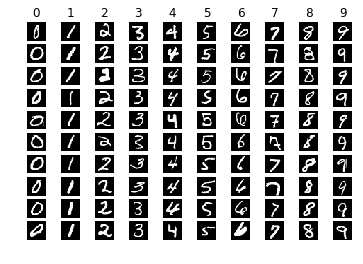

In [34]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

for i in range(10):
    image = mnist.train.images[0]
    digits = np.argmax(mnist.train.labels, 1)
    
    idxs = (digits == i)

    images = mnist.train.images[idxs][0:10]

    for j in range(10):   
        plt.subplot(10, 10, i + j*10 + 1)
        plt.imshow(images[j].reshape(28, 28), cmap='gray')
        if j == 0:
            plt.title(i)
        plt.axis('off')
plt.show()

In [6]:
def weight_variable(shape):
  initial = tf.truncated_normal(shape, stddev=0.1)
  return tf.Variable(initial)

def bias_variable(shape):
  initial = tf.constant(0.1, shape=shape)
  return tf.Variable(initial)

In [18]:
print('Initialising...')

input_size = 784
encode_dims = 2
hidden_size = 1000

# input layer (MNIST digit)
x = tf.placeholder("float", [None, input_size])

# encoder
encoder_w1 = weight_variable([input_size, hidden_size])
encoder_b1 = bias_variable([hidden_size])
encoder_y1 = tf.nn.relu(tf.add(tf.matmul(x, encoder_w1), encoder_b1))

encoder_w2 = weight_variable([hidden_size, hidden_size])
encoder_b2 = bias_variable([hidden_size])
encoder_y2 = tf.nn.relu(tf.add(tf.matmul(encoder_y1, encoder_w2), encoder_b2))

# encoded
encoder_w3 = weight_variable([hidden_size, encode_dims])
encoder_b3 = bias_variable([encode_dims])
z = tf.nn.relu(tf.add(tf.matmul(encoder_y2, encoder_w3), encoder_b3))

# decoder
decoder_w1 = weight_variable([encode_dims, hidden_size])
decoder_b1 = bias_variable([hidden_size])
decoder_y1 = tf.nn.relu(tf.add(tf.matmul(z, decoder_w1), decoder_b1))

decoder_w2 = weight_variable([hidden_size, hidden_size])
decoder_b2 = bias_variable([hidden_size])
decoder_y2 = tf.nn.relu(tf.add(tf.matmul(decoder_y1, decoder_w2), decoder_b2))

# output (re-encoded MNIST digit)
decoder_w3 = weight_variable([hidden_size, input_size])
decoder_b3 = bias_variable([input_size])
y = tf.nn.relu(tf.add(tf.matmul(decoder_y2, decoder_w3), decoder_b3))

loss = tf.losses.mean_squared_error(y, x)

train_step = tf.train.AdamOptimizer(learning_rate=1e-5).minimize(loss)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(10000):
        batch = mnist.train.next_batch(50)
        train_step.run(feed_dict={x: batch[0]})
        _, loss_ = sess.run([train_step, loss], feed_dict={x: batch[0]})
        if i % 100 == 0:
            test_loss = sess.run(loss, feed_dict={x: mnist.test.images})
            print('{}  {:0.5f}  {:0.5f}'.format(i, loss_, test_loss))


Initialising...
0  0.54530  0.54098
100  0.10855  0.10908
200  0.08766  0.08544
300  0.07922  0.08377
400  0.08201  0.08341
500  0.08528  0.08342
600  0.07920  0.08341
700  0.07591  0.08346
800  0.08356  0.08341
900  0.08040  0.08341
1000  0.08035  0.08344
1100  0.08322  0.08341
1200  0.08190  0.08339
1300  0.07664  0.08341
1400  0.08307  0.08340
1500  0.07980  0.08328
1600  0.08675  0.08333
1700  0.08100  0.08330
1800  0.07977  0.08335
1900  0.08589  0.08328
2000  0.08183  0.08327
2100  0.07832  0.08326
2200  0.08874  0.08330
2300  0.07869  0.08331
2400  0.08583  0.08326


KeyboardInterrupt: 